# <stan style="color:orange">Distribución espacial de las fibras y cálculo de sus distancias al electrodo </stan>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import signal
#import pandas as pd
#from scipy.interpolate import interp1d
import random
from shapely import Polygon,Point
from shapely.plotting import plot_polygon, plot_points
#import geopandas as gpd

In [46]:
import sys
!{sys.executable} -m pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 22.0/22.0 MB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 28.1 MB/s eta 0:00:00
     -------------------------------------- 155.3/155.3 kB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 60.0/60.0 kB ? eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB ? eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## <span style="color: cyan"> Señal de entrada</stan>


Esto no es parte del modelo. Es una forma de generar la entrada al modelo. Esta es una forma medio pobre, voy a tener que buscarle una forma mejor. 

In [2]:
fs = 20000
#t1 = np.linspace(1/fs, 0.4, 8000)
t1=np.arange(1/fs,0.4+1/fs,1/fs)
fc = 2000
orden = 2
b, a = signal.butter(orden, fc/(fs/2))
x = np.zeros_like(t1)
x[3999] = 1
Vm = signal.lfilter(b, a, x)
Vm = Vm / np.max(Vm)
#plt.plot(t1, Vm)
#print(type(Vm))
#print(t1,type(t1),len(t1))

## <stan style="color: cyan"> Modelado del nervio y sus fibras </stan>

AGREGAR:
* Mejorar la distribución con coordenadas polares
* Permitir hacer otro tipo de distribución que no sea la uniforme
* Permitir ingresar manualmente la distribución de las fibras
* Ver qué onda con el espacio finito de las fibras (que no se sobrepongan una sobre otra) (ver si tiene sentido)
* Que el electrodo no sea un punto sino que tenga un tamaño, así la distancia de la fibra al electrodo sea la mínima distancia

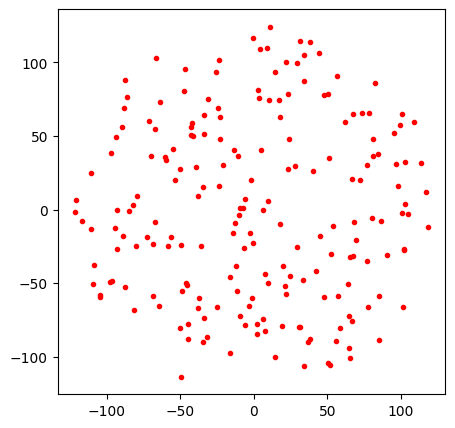

In [27]:
#Distribución uniforme


nu = 200 # cantidad de fibras
diametro = 250 #diametro del nervio
radio = diametro/2

fibras = np.zeros((nu,2))
np.random.seed(123)
#Distribución uniforme
for i,num in enumerate(fibras):
    length = np.random.uniform(0,radio**2)
    angle = np.pi * np.random.uniform(0, 2)
    x = np.sqrt(length) * np.cos(angle)
    y = np.sqrt(length) * np.sin(angle)
    fibras[i] = [x,y]

#print(fibras)

plt.figure(figsize = (5,5))
plt.plot(fibras[:,0],fibras[:,1],"r .")

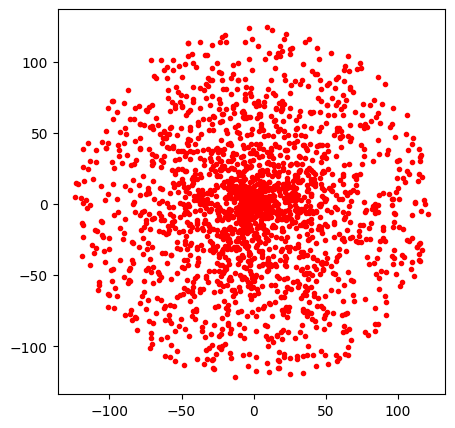

In [7]:
#Distribución Normal (De 0 a pi)

nu = 2000 # cantidad de fibras
diametro = 250 #diametro del nervio
radio = diametro/2

fibras = np.zeros((nu,2))


for i,num in enumerate(fibras):
    length = np.random.normal(0,radio)
    angle = np.pi * np.random.uniform(0, 1)
    #print(length,angle)
    while np.abs(length) > radio:
        length = np.random.normal(0,radio)
    #print("x", length, angle)
    x = length * np.cos(angle)
    y = length * np.sin(angle)
    fibras[i] = [x,y]

#print(fibras, len(fibras))


plt.figure(figsize = (5,5))
plt.plot(fibras[:,0],fibras[:,1],"r .")

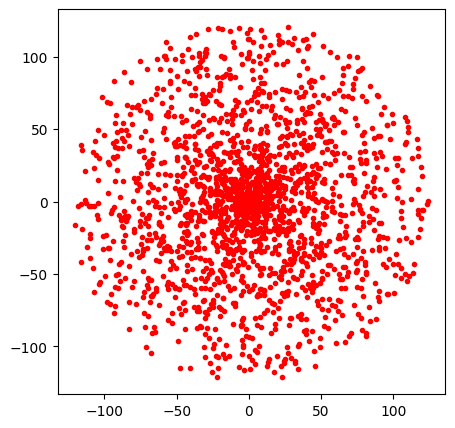

In [8]:
#Distribución Normal (De 0 a 2pi)

nu = 2000 # cantidad de fibras
diametro = 250 #diametro del nervio
radio = diametro/2

fibras = np.zeros((nu,2))

for i,num in enumerate(fibras):
    length = np.random.normal(0,radio)
    angle = np.pi * np.random.uniform(0, 2)
    while np.abs(length) > radio:
        length = np.random.normal(0,radio)
    x = length * np.cos(angle)
    y = length * np.sin(angle)
    # TODO así se carga fibra a fibra --> self.lista_fibras.append(Fibra(x,y))
    fibras[i] = [x,y]

plt.figure(figsize = (5,5))
plt.plot(fibras[:,0],fibras[:,1],"r .")

In [21]:
#Ingreso manual de unicación de fibras

fibras = pd.read_csv("fibras.csv")

numero_fibras = len(fibras)

for i in range(0,numero_fibras):
    x = fibras["x"][i]
    y = fibras["y"][i]
    #self.lista_fibras.append(Fibra(x,y))


In [ ]:
# Calculo de distancia de cada fibra electrodo --------------------------------
dist = []
electrodo = [0,a] #ubicacion del electrodo
for item in puntitos:
    #dist.append(np.sqrt((item[0])**2 + (np.abs(a) + item[1])**2))
    dist.append(np.linalg.norm(item-electrodo))

dist = np.array(dist)

#print(dist,len(dist),type(dist))

#! Ver de cambiar la forma en la que creo dist y los puntos, así no sean primero listas


In [ ]:
# Más parámetros del modelo

nn = 2 #numero de nodos
den = 1000 #distancia entre nodos
dx = 12000 #distancia en micras al primer electrodo
dx1 = 16000 #distancia en micras al segundo electrodo

In [16]:
#Prueba de distancia de un punto a una línea
punto1 = np.array([0,4])
punto2 = np.array([6,4])
punto3 = np.array([50,1])
d = np.linalg.norm(np.cross(punto2-punto1, punto1-punto3))/np.linalg.norm(punto2-punto1)
print(d)

3.0


In [24]:
import numpy as np
from numpy.linalg import norm

A = np.array([0,4])
B = np.array([6,4])
P = np.array([10,0])

if np.arccos(np.dot((P-A)/norm(P-A), (B-A)/norm(B-A))) > np.pi/2:
    d = norm(P-A)
elif np.arccos(np.dot((P-B)/norm(P-B), (A-B)/norm(A-B))) > np.pi/2:
    d = norm(P-B)
else:
    d = norm(np.cross(B-A, A-P))/norm(B-A)

print(d)

5.656854249492381


## <stan style="color: cyan"> Copia de la entrada para cada fibra del nervio</stan>

In [ ]:
resp = [] #lo comienzo como una lista
for i in range(0,nu): #punto de mejora de entradas, aqui digo que es el mismo
    resp.append(Vm) 

#! Ver donde corcho vuelvo a usar esto porque ni idea

## <stan style="color:cyan "> Cálculo del factor mínimo de atenuación (Wmax) </stan>

In [ ]:
Wmax = np.zeros_like(dist)
for i,distancia in enumerate(dist):
    if (1-(distancia/40))<0:
        Wmax[i]=0.01
    else:
        Wmax[i]=1-(distancia/40)

#print(Wmax,len(Wmax),type(Wmax))

In [22]:
range(5)

range(0, 5)

## <stan style="color:cyan">Función para calcular el factor de ponderación (pesosW en Matlab) </stan>

In [ ]:
d=nn*den
dx=500

x=np.array(list(range(0,200000,50))) #con 200mil hay 4mil datos
ww = np.zeros(len(x)) #tamaño 1x4mil
sizeW = (len(Wmax),len(x))
W = np.zeros(sizeW) #debería ser [1x4mil ...1x4mil] de tamaño Wmax(que es 200)

for i,v in enumerate(Wmax):
    for idx,num in enumerate(x):
        if num<dx:
            m = (num/d)-(dx/d)+v
        else:
            m = (-num/d)+(dx/d)+v
        if m<0:
            m = 0
        W[i,idx]=m

#print(W)

#df = pd.DataFrame(W).T
#df.to_excel(excel_writer ="C:/Users/aguir/Desktop/Prroyecto/test.xlsx")       

## <stan style="color:cyan">Cálculo de las velocidades de conducción nerviosa </stan>

Se realiza la asignación de diámetros. Promedio 5.5 micras y desviación estándar de 1.5 micras.
Las velocidades de conducción tienen una relación lineal con el diámetro de las fibras, y puede ser estimado multiplicandola por 7.6. <span style="color: red;">Buscar bien por qué usan ese número.</span>

In [ ]:
mu, sigma = 5.5 , 1.5
diametros = np.random.normal(mu,sigma,nu) #array con diámetros
#print(diametros,type(diametros),len(diametros))

In [ ]:
#Gráfica del histograma de diámetros

#plt.hist(diametros,20)
#plt.show()


In [ ]:
vel = np.zeros(len(diametros))
for d,n in enumerate(diametros):
    vel[d]=n*7.6

## <stan style="color:cyan">Función Cálculo del single fiber action potential (sum_SFAP en Matlab) </stan>

Desde aquí abajo comienza la función

In [ ]:
N = len(W) #cantidad de fibras del nervio
x=np.array(list(range(0,200000,50))) #vector con resolución de 50 micras, igual que en pesosW()

#Ver que estos valores, si yo los cambié arriba o que onda
dx = 12000
den = 1000

#Para conseguir dd
#TODO ver si se lo puede hacer más corto
dd1 = np.arange(nn,0,-1)
dd2 = np.arange(0,nn)
for i,n in enumerate(dd1):
    dd1[i]=dx-(n*den)
for i,n in enumerate(dd2):
    dd2[i]=dx+n*den
dd = np.concatenate((dd1,dd2), axis=0)
print(dd)

fss = 100000 #subfrecuencia de muestreo (para implementar retardos)

t11=np.arange(1/fss,t1[-1]+1/fss,1/fss) #vector de tiempo remuestrado usando fss
resp_pos = np.zeros((N,len(t11))) #inicialización de la matriz respuesta


Aquí sigue con el ciclo for 

In [ ]:
# CICLO FOR HORRIBLE ---------------------------------------------


#! Primero vuelvo a resp un array, ver de cambiarlo arriba
resp = np.array(resp)

for i in range(0,N):
    f = interp1d(t1,resp[i],fill_value="extrapolate")
    RESP = f(t11)
    xx = np.array([i for (i,val) in enumerate(W[i]) if val!= 0])
    d = x[xx[0]]
    reti = np.round(((d/1000)/(vel[i]*1000))*fss)
    ret = 0
    S = np.zeros((len(dd),len(t11)))
    #Comienza el segundo for :O 
    for j in range(len(dd)-1):
        f1 = interp1d(x,W[i],fill_value="extrapolate")
        aux2 = f1(dd[j])
        aux = RESP*dd[j]
        S[j][int(reti+ret+1):len(aux)] = aux[1:(len(aux)-int(ret+reti))]
        ret=np.round((den/1000)/(vel[i]*1000)*fss)+ret
    resp_pos[i]= sum(S)
sum_SFAP1 = sum(resp_pos)


        

In [ ]:
    def distribucion_normal(self,num_fibras,semilla = None):
        np.random.seed(semilla)
        radio = self.diametro/2
        for i in range(num_fibras):
            length = np.random.normal(0,radio)
            angle = np.pi * np.random.uniform(0, 2) #? de 0 a pi o 2pi? este de es 0 a 2pi
            while np.abs(length) > radio:
                length = np.random.normal(0,radio)
            x = length * np.cos(angle)
            y = length * np.sin(angle)
            self.fibras.append(Fibra(x,y))
        self.cantidad_fibras = num_fibras

In [2]:
lista = [1,2,3,4,5]
arreglo = np.array(lista)
print(lista)
print(arreglo)

[1, 2, 3, 4, 5]
[1 2 3 4 5]


In [25]:
lista = np.genfromtxt('C:/Users/aguir/Desktop/Prroyecto/fibras_2.csv', delimiter = ',')
print(lista,type ( lista))

[[  nan   nan]
 [  nan   nan]
 [ -36.  -62.]
 [  31.   80.]
 [  21.   43.]
 [ -71.   58.]
 [ -80.  111.]
 [ -81.   -9.]
 [  29.  104.]
 [  -5.  -92.]
 [  33.   97.]
 [  76. -105.]
 [ -47.  -13.]
 [ -37. -101.]
 [ 120.   14.]
 [ -56.  121.]
 [ -35.  -49.]
 [ -95.  -42.]
 [ 113.   13.]
 [ -82.  -82.]
 [ 105.   78.]
 [ -13.  -30.]
 [ -54.  -57.]
 [  -5. -104.]
 [   6.   17.]
 [  90.  -40.]
 [ -49.  -45.]
 [ 116.   73.]
 [ -38.  -69.]
 [  55.  -25.]
 [ -72.   19.]
 [ -40.  -18.]
 [ -38.  -92.]
 [  48.   30.]
 [   8.    4.]
 [  39.  -91.]
 [  16.  -76.]
 [ 104. -114.]
 [ -74.   99.]
 [ 124.   47.]
 [-109.  -65.]
 [ -58.  -27.]
 [ -33.  -37.]
 [ -53.   97.]
 [  15.   -6.]
 [  83.    9.]
 [  49.   79.]
 [ 125.  115.]
 [  52.  -67.]
 [ 105.    1.]
 [  32.   92.]
 [ -11.  -30.]
 [  22.  -47.]
 [ -56.  125.]
 [ -35.  -12.]
 [ 116. -122.]
 [   6.   62.]
 [ -10.  -63.]
 [  74.  -78.]
 [-118. -114.]
 [  57.   42.]
 [-118.   15.]
 [ 120.   65.]
 [  70.   96.]
 [  79.  -58.]
 [ 114.  -94.]
 [  54.   

In [26]:
print(lista)

[[  nan   nan]
 [  nan   nan]
 [ -36.  -62.]
 [  31.   80.]
 [  21.   43.]
 [ -71.   58.]
 [ -80.  111.]
 [ -81.   -9.]
 [  29.  104.]
 [  -5.  -92.]
 [  33.   97.]
 [  76. -105.]
 [ -47.  -13.]
 [ -37. -101.]
 [ 120.   14.]
 [ -56.  121.]
 [ -35.  -49.]
 [ -95.  -42.]
 [ 113.   13.]
 [ -82.  -82.]
 [ 105.   78.]
 [ -13.  -30.]
 [ -54.  -57.]
 [  -5. -104.]
 [   6.   17.]
 [  90.  -40.]
 [ -49.  -45.]
 [ 116.   73.]
 [ -38.  -69.]
 [  55.  -25.]
 [ -72.   19.]
 [ -40.  -18.]
 [ -38.  -92.]
 [  48.   30.]
 [   8.    4.]
 [  39.  -91.]
 [  16.  -76.]
 [ 104. -114.]
 [ -74.   99.]
 [ 124.   47.]
 [-109.  -65.]
 [ -58.  -27.]
 [ -33.  -37.]
 [ -53.   97.]
 [  15.   -6.]
 [  83.    9.]
 [  49.   79.]
 [ 125.  115.]
 [  52.  -67.]
 [ 105.    1.]
 [  32.   92.]
 [ -11.  -30.]
 [  22.  -47.]
 [ -56.  125.]
 [ -35.  -12.]
 [ 116. -122.]
 [   6.   62.]
 [ -10.  -63.]
 [  74.  -78.]
 [-118. -114.]
 [  57.   42.]
 [-118.   15.]
 [ 120.   65.]
 [  70.   96.]
 [  79.  -58.]
 [ 114.  -94.]
 [  54.   

In [27]:
for i in lista:
    print(type(float(i[0])),float(i[0]))


<class 'float'> nan
<class 'float'> nan
<class 'float'> -36.0
<class 'float'> 31.0
<class 'float'> 21.0
<class 'float'> -71.0
<class 'float'> -80.0
<class 'float'> -81.0
<class 'float'> 29.0
<class 'float'> -5.0
<class 'float'> 33.0
<class 'float'> 76.0
<class 'float'> -47.0
<class 'float'> -37.0
<class 'float'> 120.0
<class 'float'> -56.0
<class 'float'> -35.0
<class 'float'> -95.0
<class 'float'> 113.0
<class 'float'> -82.0
<class 'float'> 105.0
<class 'float'> -13.0
<class 'float'> -54.0
<class 'float'> -5.0
<class 'float'> 6.0
<class 'float'> 90.0
<class 'float'> -49.0
<class 'float'> 116.0
<class 'float'> -38.0
<class 'float'> 55.0
<class 'float'> -72.0
<class 'float'> -40.0
<class 'float'> -38.0
<class 'float'> 48.0
<class 'float'> 8.0
<class 'float'> 39.0
<class 'float'> 16.0
<class 'float'> 104.0
<class 'float'> -74.0
<class 'float'> 124.0
<class 'float'> -109.0
<class 'float'> -58.0
<class 'float'> -33.0
<class 'float'> -53.0
<class 'float'> 15.0
<class 'float'> 83.0
<class 'f

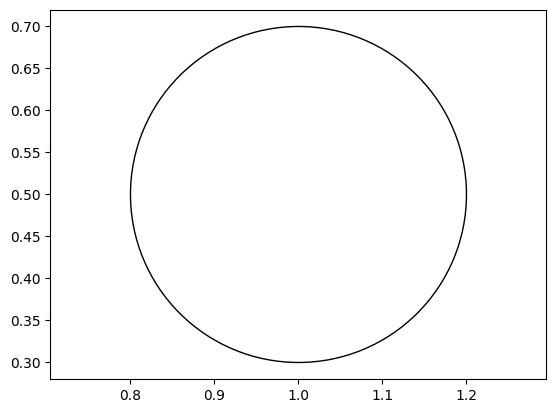

In [8]:
plt.gca().add_patch(plt.Circle((1, 0.5), 0.2, edgecolor = 'black',facecolor = 'None'))
plt.axis('equal')
plt.show()

In [18]:
radio = 250/2
num_fibras = 200

In [20]:
longitud = np.random.uniform(0,radio**2, size = num_fibras)
angulo = np.pi * np.random.uniform(0,2,size = num_fibras)
x = np.sqrt(longitud) * np.cos(angulo)
y = np.sqrt(longitud) * np.sin(angulo)

In [ ]:
    def manual(self,lista_fibras):
        """Método con el cual se puebla el nervio con fibras de forma manual, ingresando una lista con las posiciones de las fibras.

        Args:
            lista_fibras (list): Lista con las posiciones de las fibras.
            num_fibras (int): Número de fibras con las que se pobló el nervio.

        Raises:
            OutOfBounds: Error por encontrar una fibra que supere los límites del nervio.
        """
        for f in lista_fibras:
            if not is_inside_puntoencirculo(self.radio,f[0],f[1]):
                

In [52]:
a = np.genfromtxt('C:/Users/aguir/Desktop/Prroyecto/fibras_convacios.csv',delimiter = ',')

## <stan style="color : cyan"> Ubicación de nodos </stan>

In [55]:
nn = 8
den = 5
xe = 10

In [56]:
# ESTE SIRVE PARA TODOS
np.linspace(xe-((den/2) * (nn-1)),xe+((den/2) * (nn-1)),nn)

array([-7.5, -2.5,  2.5,  7.5, 12.5, 17.5, 22.5, 27.5])

In [53]:
nn = 9
den = 4
xe = 10

In [54]:
# NO USAR
np.linspace(xe-(nn//den)*den,xe+(nn//den)*den,nn)

array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

### <stan style="color: orange">1. Variar la distancia entre nodos en un porcentaje</stan>

In [154]:
# ESTE SIRVE PARA TODOS
np.linspace(xe-((den/2) * (nn-1)),xe+((den/2) * (nn-1)),nn)

array([-6., -2.,  2.,  6., 10., 14., 18., 22., 26.])

In [89]:
np.array([1,10,100])*np.random.uniform(0.9,1.1)

array([  1.08834405,  10.8834405 , 108.83440504])

In [295]:
a = 10
var = 0
a = a + a*np.random.uniform(-var/100,var/100)
print(a)

10.0


In [155]:
nn = 9
den = 4
xe = 10

In [150]:
var = 10 #este será el porcentaje que va a variar

In [156]:
den = den + den * np.random.uniform(-var/100,var/100)
print(den)
np.linspace(xe-((den/2) * (nn-1)),xe+((den/2) * (nn-1)),nn)

3.904330926025926


array([-5.6173237 , -1.71299278,  2.19133815,  6.09566907, 10.        ,
       13.90433093, 17.80866185, 21.71299278, 25.6173237 ])

In [ ]:
#NO USO ESTO AL FINAL, USO EL DE ARRIBA
den = den * np.random.uniform(1-var/100,1+var/100)
print(den)
np.linspace(xe-((den/2) * (nn-1)),xe+((den/2) * (nn-1)),nn)

### <stan style="color : orange"> 2. Correr la ubicación de las fibras en un porcentaje </stan>

In [ ]:
# ESTE SIRVE PARA TODOS
np.linspace(xe-((den/2) * (nn-1)),xe+((den/2) * (nn-1)),nn)

In [90]:
lista = np.array([1,10,100])

In [92]:
lista + 1 #asi nomas le sumo un numero a todos

array([  2,  11, 101])

In [137]:
lista + np.random.uniform(-1,1) #aumo o quito numero aleatorios a toda la lista

array([1.52187052e-02, 9.01521871e+00, 9.90152187e+01])

In [159]:
nn = 9
den = 4
xe = 10

In [177]:
mov = 1 #+- la cantidad que se quiera mover

In [176]:
desp = np.random.uniform(-mov,mov)
np.linspace(xe-((den/2) * (nn-1))+desp,xe+((den/2) * (nn-1))+desp,nn)

array([-5.77581537, -1.77581537,  2.22418463,  6.22418463, 10.22418463,
       14.22418463, 18.22418463, 22.22418463, 26.22418463])

In [189]:
np.random.uniform(1,1)

1.0

### <stan style="color : orange"> 3. Unir variación y desplazamiento </stan>

In [356]:
# FORMA GENERAL
np.linspace(xe-((den/2) * (nn-1)),xe+((den/2) * (nn-1)),nn)

array([ 5.,  7.,  9., 11., 13., 15.])

In [355]:
nn = 6
den = 2
xe = 10

In [352]:
movimiento = 2
variacion = 10

In [353]:
den = 2
desplazamiento = np.random.uniform(-movimiento,movimiento)
den = den + den * np.random.uniform(-variacion/100,variacion/100)
print(den,desplazamiento)

2.0666296004575457 -1.609581698946286


In [354]:
np.linspace(xe-((den/2) * (nn-1))+desplazamiento,xe+((den/2) * (nn-1))+desplazamiento,nn)

array([ 3.2238443,  5.2904739,  7.3571035,  9.4237331, 11.4903627,
       13.5569923])

In [ ]:
def funcion(param_a,param_b):
    pass

def otra_funcion(miparametro,tuparametro=0):
    a = miparametro * tuparametro
    funcion(param_b = 5,param_a = miparametro) #aqui tiene que ir en el mismo orden 

otra_funcion(5)

### <stan style = "color : cyan">Quitar elementos de un array con una condición</stan>

In [41]:
a = np.array([-2,-3,0,1,2,4])


In [42]:
a = a[a > 0]

In [43]:
a

array([1, 2, 4])

### <stan style = "color : cyan">Numpy random normal</stan>

In [81]:
mu = 0
sigma = 0
np.random.normal(mu,sigma)

0.0

In [26]:
np.random.normal(0,5,5)

array([-0.53138867, -6.10444755,  4.27749583, -1.81326039,  2.54103322])

### <stan style = "color : cyan">Numpy random uniform</stan>

In [2]:
np.random.uniform(0,1,5)

array([0.46584485, 0.60030444, 0.99440032, 0.99317657, 0.92307466])

In [56]:
longitud_fibra = 50000
distancia_nodos = 10000
variacion = 1000
desplazamiento = 0

In [57]:
arr = np.arange(-longitud_fibra/2,longitud_fibra*1.5 +1,distancia_nodos)
var = np.random.uniform(-variacion,variacion,len(arr)) + desplazamiento

In [34]:
arr = np.arange(-longitud_fibra/2,longitud_fibra*1.5 +1,distancia_nodos)
var = np.random.normal(0,variacion,len(arr)) + desplazamiento

In [58]:
arr

array([-25000., -15000.,  -5000.,   5000.,  15000.,  25000.,  35000.,
        45000.,  55000.,  65000.,  75000.])

In [59]:
var

array([ 487.98782496,  979.25171585,  956.01477873, -546.72808653,
        920.45511754, -729.40007552, -589.41284107, -580.73550734,
       -465.19045572,  816.80364903,  436.09192884])

In [60]:
arr + var

array([-24512.01217504, -14020.74828415,  -4043.98522127,   4453.27191347,
        15920.45511754,  24270.59992448,  34410.58715893,  44419.26449266,
        54534.80954428,  65816.80364903,  75436.09192884])

In [45]:
b = arr + var

In [55]:
b

array([  532.07961522,  1534.08992867,  2778.97296207,  2582.22274644,
        3673.77181334,  3554.69214997,  5811.54012076,  8238.75711559,
        6826.54992599, 10347.68095489,  9455.02498336, 11153.76654929,
       11780.08223773, 12092.75059866, 13365.27612965, 15255.74931039,
       16447.43496101, 17248.74176124, 19038.29562101, 18261.0183788 ,
       18668.00672609, 22289.72033857, 23175.51671374, 22971.06937795,
       24848.7267009 , 23819.40249086, 26193.47035395, 27146.99472264,
       27912.95354332, 29156.07034805, 30420.25560537, 31106.966258  ,
       33282.74553786, 32811.93173924, 33246.96305328, 33652.22579973,
       35811.39769   , 37703.84394841, 39079.3040341 , 40023.42737755,
       37530.50060009, 41472.21969357, 40862.2283642 , 43285.68031809,
       45158.13406185, 45623.88010012, 45690.94949885, 48128.74164324,
       49815.74301023, 49736.33601528])

In [54]:
b = b[(b>0) & (b<50000)]

In [39]:
np.random.uniform(-1,1)

-0.4359152791900516

In [40]:
a = np.array([1,3,2,2,6,8])

In [64]:
a = [1,2,3,4]

In [65]:
del a[-1]

In [66]:
a

[1, 2, 3]

### <stan style = "color : cyan ">Dibujar con shapely  </stan>

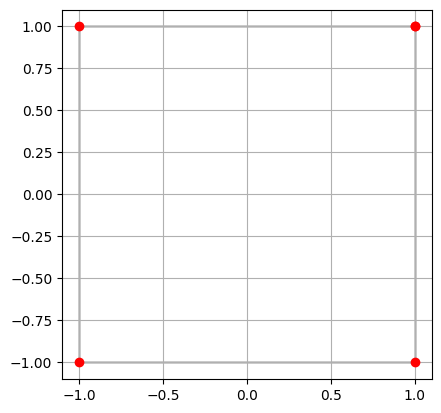

In [23]:
#coordenadas = [(1,1),(1,-1),(-1,-1),(-1,1)]
coord = Polygon([(1,1),(1,-1),(-1,-1),(-1,1)])
plot_polygon(coord,color = 'red', facecolor='None',edgecolor = 'black')
#plot_points(coord)
plt.show()

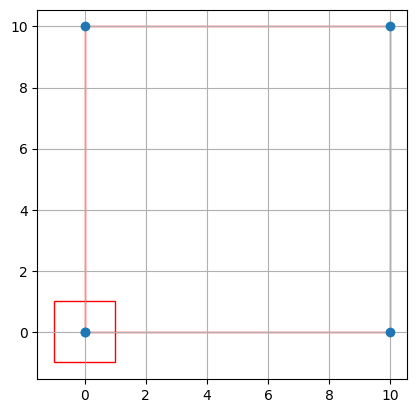

In [43]:
cuadrado = Polygon([(0,0),(10,0),(10,10),(0,10)])
plot_polygon(cuadrado, facecolor='None', edgecolor='red')
coord = Polygon([(1,1),(1,-1),(-1,-1),(-1,1)])
plot_polygon(coord, add_points = False,facecolor='None', edgecolor = 'red')
plt.show()

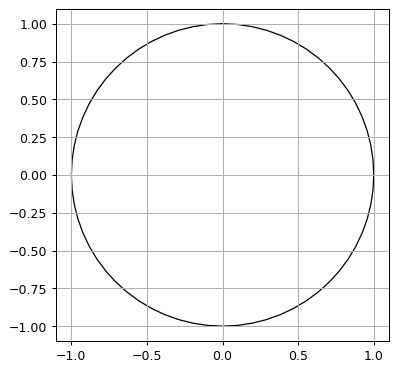

In [11]:
fig = plt.figure(1, dpi=90)
circ = Point((0,0)).buffer(1)
#plot_points(circ)
plot_polygon(circ, add_points=False,edgecolor = 'black',facecolor='None')

In [13]:
fig.grid(False)

AttributeError: 'Figure' object has no attribute 'grid'

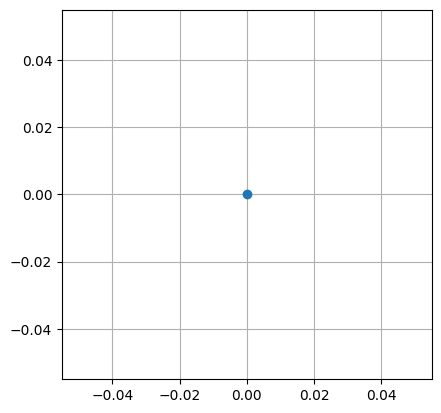

In [7]:
plot_points(Point(0,0))

In [10]:
shape = Point(0,0).buffer(0)
print(shape)


POLYGON EMPTY


In [ ]:
polygon1 = Polygon([(0,5),
                    (1,1),
                    (3,0),
                    ])

 p = gpd.GeoSeries(polygon1)
 p.plot()
 plt.show()

In [2]:
punto = Point(0,0)
circulo = Point(0,0).buffer(2)
pol = Polygon([(1,1),(1,-1),(-1,-1),(-1,1)])

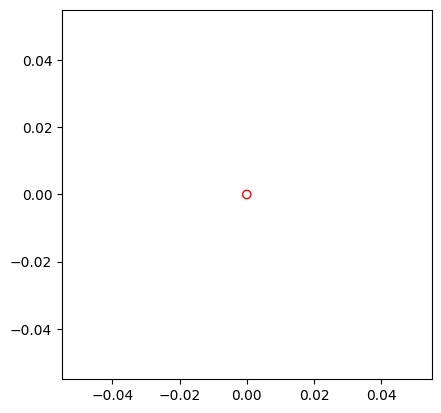

In [3]:
p = gpd.GeoSeries(punto)
p.plot(edgecolor = 'red', facecolor = 'None')
plt.show()

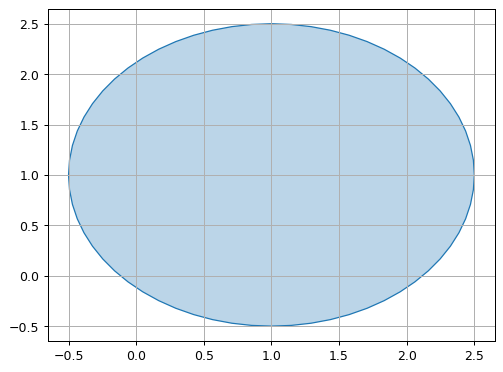

In [29]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.plotting import plot_polygon

fig = plt.figure(1, dpi=90)

a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)

# 1
#ax = fig.add_subplot(121)
#ax.grid(True)
ax = plt.axes()
#ax.grid(True)
#plot_polygon(a, ax=ax, add_points=False)
plot_polygon(a,ax=ax,add_points=False)
#plot_polygon(b, ax=ax, add_points=False)

#c = a.intersection(b)
#plot_polygon(c, ax=ax, add_points=False)

#ax.set_title('a.intersection(b)')


#2
#ax = fig.add_subplot(122)
#
#plot_polygon(a, ax=ax, add_points=False)
#plot_polygon(b, ax=ax, add_points=False)
#
#c = a.symmetric_difference(b)
#plot_polygon(c, ax=ax, add_points=False)
#
#ax.set_title('a.symmetric_difference(b)')


#plt.show()

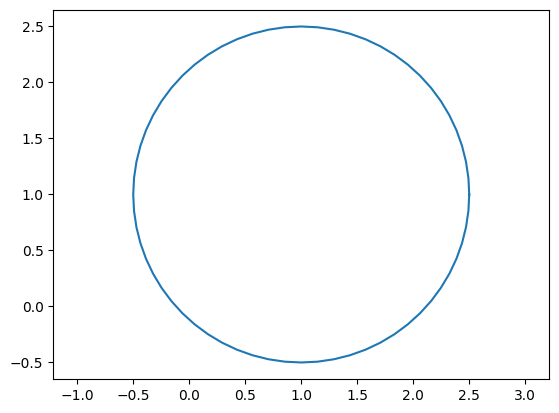

In [15]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.plotting import plot_polygon

a = Point(1, 1).buffer(1.5)
b = Point(2, 1)
x,y = a.exterior.xy
w,z = b.x,b.y

plt.axis('equal')
plt.plot(x,y)
plt.plot(w,z)

plt.show()


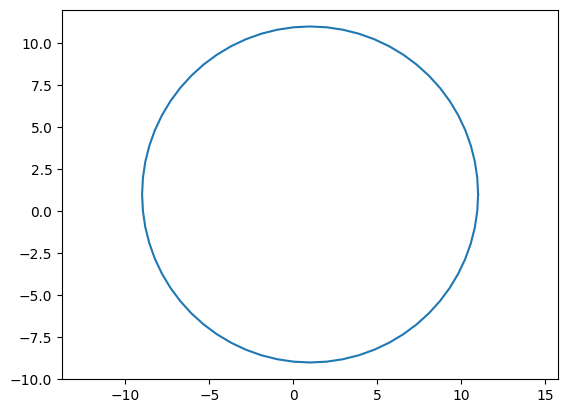

In [27]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.plotting import plot_polygon


x,y = Point(1, 1).buffer(10).exterior.xy

plt.axis('equal')
plt.plot(x,y)

plt.show()

In [28]:
lista = ['e1','e2','e3']

for e in lista:
    index = lista.index(e)
    print(index)


0
1
2


In [11]:
d = np.random.normal(2,0)
print(d)

2.0


In [17]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [19]:
a[:,3]

IndexError: index 3 is out of bounds for axis 1 with size 3

In [21]:
np.array([[1,2,3],[4,5,6],[7,8,9]])[:,1]

array([2, 5, 8])

In [ ]:
[[73.23958313,3.92731714,2.5],[9.90834512,-38.99651803,2.5],[-57.91269168,39.38951769,2.5]]

In [28]:
a = np.array([[ 2.52311858e+01, -8.11397542e+01,  5.00000000e+00],
       [ 4.68025803e+01,  3.84263151e+01,  5.00000000e+00],
       [-7.49968319e+01,  9.04491870e+01,  5.00000000e+00],
       [-1.05791373e+02,  3.81325669e+01,  5.00000000e+00],
       [-2.71689366e+01, -7.73837089e+01,  5.00000000e+00],
       [-1.13240664e+01,  1.14682326e+02,  5.00000000e+00],
       [ 6.92916183e+01,  6.09061185e+00,  5.00000000e+00],
       [ 6.61862081e+01, -7.88947501e+01,  5.00000000e+00],
       [ 8.77197791e+01,  3.76309822e+01,  5.00000000e+00],
       [-7.54855225e+01, -7.83548324e+01,  5.00000000e+00],
       [-8.09183769e+01,  1.65342710e+01,  5.00000000e+00],
       [-6.99526161e+01, -3.68794459e+01,  5.00000000e+00],
       [-6.99146626e+01,  5.65192187e+01,  5.00000000e+00],
       [ 9.64513679e+01, -1.82731042e+01,  5.00000000e+00],
       [-1.07632461e+02, -4.61583003e+01,  5.00000000e+00],
       [ 8.34964956e+01, -3.26494592e+01,  5.00000000e+00],
       [-4.34147676e+01,  7.62816128e+01,  5.00000000e+00],
       [ 5.17527933e+01, -7.40475129e+01,  5.00000000e+00],
       [-4.13220670e+01, -5.16027760e+01,  5.00000000e+00],
       [ 4.28629419e+01,  9.34062130e+01,  5.00000000e+00],
       [-1.34884898e+01,  9.71445504e+01,  5.00000000e+00],
       [-7.41548364e+01, -4.64176393e+01,  5.00000000e+00],
       [-3.47172374e+01, -8.46711226e+01,  5.00000000e+00],
       [ 2.00431464e+01, -7.22293318e+01,  5.00000000e+00],
       [ 5.39503167e+00,  1.10591914e+02,  5.00000000e+00],
       [ 5.70455459e+01, -5.68794552e+01,  5.00000000e+00],
       [-6.12041635e+01, -7.02271503e+01,  5.00000000e+00]])

In [34]:
np.savetxt("fibras_condiametro.csv", a, delimiter=",")

In [35]:
b = a[:,(0,1)]

In [36]:
np.savetxt("fibras_sindiametro.csv", b, delimiter=",")

### <stan style="color: cyan"> Borro los metodos manual y desde archivos separados</stan>

In [ ]:
    def manual(self,diametro_fibra,lista_fibras):
        """Método con el cual se puebla el nervio con fibras de forma manual, ingresando una lista con las posiciones de las fibras.

        Args:
            diametro_fibra (float): Diámetro de las fibras. 
            lista_fibras (list): Lista con las posiciones de las fibras.

        Raises:
            OutOfBounds: Error por encontrar una fibra que supere los límites del nervio.
        """
        f = [Fibra(x,y,diametro_fibra) for x,y in lista_fibras if is_inside_puntoencirculo(self.radio,x,y,self.centro_nervio_x,self.centro_nervio_y)]
        if len(f)!=len(lista_fibras):
            raise OutOfBounds ("Se encontró por lo menos una fibra fuera de los límites del nervio.")        
        self.fibras= f
        self.cantidad_fibras = len(lista_fibras)

    def manual_condiametro(self,lista_fibras):
        """Método con el cual se puebla el nervio de forma manual, a partir de un array de 3 columnas: coordenadas x, coordenadas y, diámetros de las fibras.

        Args:
            lista_fibras (list): Lista con la información de las fibras.

        Raises:
            OutOfBounds: Al detectar por lo menos una fibra fuera de los límites del nervio.
        """
            
        f = [Fibra(x,y,d) for x,y,d in lista_fibras if is_inside_circencirc(d/2,x,y,self.radio,self.centro_nervio_x,self.centro_nervio_y)]
        if len(f)!=len(lista_fibras):
            raise OutOfBounds ("Se encontró por lo menos una fibra fuera de los límites del nervio.")        
        self.fibras= f
        self.cantidad_fibras = len(lista_fibras)

In [ ]:
    def desde_archivo(self,diametro_fibra,ubicacion_archivo):
        """Método con el cual se carga un archivo con ubicación de fibras y se puebla el nervio con ellas.

        Args:
            diametro_fibra (float): Diámetro de las fibras en micrómetros.
            ubicacion_archivo (str):Dirección donde se encuentra el archivo csv con la ubicación de las fibras.

        Raises:
            LoadingError: Error de carga del archivo.
            ValueError: Se levanta cuando el archivo tiene un elemento no numérico.
            OutOfBounds: Se levanta cuando se encuentra una fibra posicionada fuera del diámetro del nervio.
        """
        try:
            lista_fibras = np.genfromtxt(ubicacion_archivo, delimiter = ',')
        except Exception as e:
            raise LoadingError('Fallo en carga de archivo.') from e
        
        if not np.isnan(sum(lista_fibras)).any() and np.issubdtype(lista_fibras.dtype, np.number):
            self.manual(diametro_fibra,lista_fibras)
        else:
            raise ValueError ("La lista contiene caracteres que no son números.")
    
    def desde_archivo_condiametro(self,ubicacion_archivo):
        """Método con el cual se puebla un nervio a partir de la carga de un archivo con la información de las fibras, las cuales deben organizarse en 3 columnas: coordenadas x, coordenadas y, diámetros de las fibras.

        Args:
            ubicacion_archivo (str):Dirección donde se encuentra el archivo csv con la información de las fibras.

        Raises:
            LoadingError: Error de carga del archivo.
            ValueError: Se levanta cuando el archivo tiene un elemento no numérico.
            OutOfBounds: Se levanta cuando se encuentra una fibra posicionada fuera del diámetro del nervio.
        """
        try:
            lista_fibras = np.genfromtxt(ubicacion_archivo, delimiter = ',')
        except Exception as e:
            raise LoadingError('Fallo en carga de archivo.') from e

        if not np.isnan(sum(lista_fibras)).any() and np.issubdtype(lista_fibras.dtype, np.number):
            self.manual_condiametro(lista_fibras)   
        else:
            raise ValueError ("La lista contiene caracteres que no son números.")

### <stan style="color : cyan">Np column stack</stan>

In [4]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,8,9])
matriz = np.column_stack((a,b,c))
print(matriz)

[[1 4 7]
 [2 5 8]
 [3 6 9]]


### <stan style="color : cyan">Métodos uniformes que borro</stan>

In [ ]:
# Uniforme con superposición y diámetro fijo    
def distribucion_uniforme(self,num_fibras,semilla,diametro_fibra):
        """Método con el cual se puebla el nervio con fibras con distribución uniforme.
        El diámetro de las fibras es el mismo para todas las fibras con este método.

        Args:
            num_fibras (int): Número de fibras que tendrá el nervio.
            semilla (int, optional): Número de la semilla. Por defecto es None.
            diametro_fibra (float): Diámetro de la fibra en micrones. Por defecto es 0, si se trata de fibras puntuales.
        """
        #Tiene centro en (0,0), implementar el traslado 
        np.random.seed(semilla)
        longitud = np.random.uniform(0,self.radio**2, size = num_fibras)
        angulo = np.pi * np.random.uniform(0,2,size = num_fibras)
        x = np.sqrt(longitud) * np.cos(angulo)
        y = np.sqrt(longitud) * np.sin(angulo)
        matriz = np.column_stack((x,y))
        self.fibras = [Fibra(x,y,diametro_fibra) for x,y in matriz]
        self.cantidad_fibras = num_fibras

In [ ]:
#Uniforme sin superposición con diámetro fijo
def uniforme_sin_superposicion(self,num_fibras,semilla,diametro_fibra):
        """Método para poblar el nervio con el cual se evita la superposición de fibras entre sí, siendo contenidas dentro de los límites del nervio.

        Args:
            num_fibras (int): Número de fibras que tendrá el nervio.
            semilla (int, optional): Número de la semilla. Por defecto es None.
            diametro_fibra (float): Diámetro de la fibra en micrones.
        """
        np.random.seed(semilla)

        if diametro_fibra == 0 :
            raise InputError("Para este método es necesario ingresar un diámetro de fibras distinto a cero.")
 
        lista = []
        while len(lista) < num_fibras:
            choque = False
            length = np.random.uniform(0,self.radio**2)
            angle = np.pi * np.random.uniform(0, 2) 
            x = np.sqrt(length) * np.cos(angle)
            y = np.sqrt(length) * np.sin(angle)

            for a,b in lista:
                if distancia_entre_puntos(x,y,a,b) < diametro_fibra:
                    choque = True
            if choque is False and is_inside_circencirc(diametro_fibra/2,x,y,self.radio,self.centro_nervio_x,self.centro_nervio_y):
                lista.append([x,y])
        self.fibras = [Fibra(x,y,diametro_fibra) for x,y in lista]
        self.cantidad_fibras = num_fibras